In [20]:
import numpy as np
import pickle

from utils import load_data, sigmoid

# NN arctechture
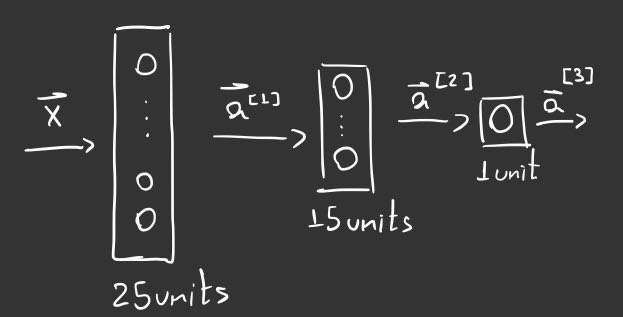

This notebook goal is to learn how to forward propagate an NN from scratch, so the process of training will not bet contemplated

Weights from a model previous trained will be loaded

In [21]:
# Load dataset
X, y = load_data()

# Load weights of the previous trained model
with open('data/model_weights.pkl', 'rb') as file:
    weights_dic = pickle.load(file)

W1 = weights_dic['W1']
b1 = weights_dic['b1']
W2 = weights_dic['W2']
b2 = weights_dic['b2']
W3 = weights_dic['W3']
b3 = weights_dic['b3']

In [22]:
weights_dic['W3'].shape

(15, 1)

In [23]:
# Lets take a look in the data format
print(f'X.shape={X.shape}\ny.shape={y.shape}')
_ = [print(f'{key}.shape={weights_dic[key].shape}') for key in weights_dic.keys()]

X.shape=(1000, 400)
y.shape=(1000, 1)
W1.shape=(400, 25)
b1.shape=(25,)
W2.shape=(25, 15)
b2.shape=(15,)
W3.shape=(15, 1)
b3.shape=(1,)


In [24]:
def layer_forward_propagation(input, W, b, activation_function):

    Z = np.matmul(input, W) + b
    a = activation_function(Z)

    return a

def NN_forward_propagation(input, W, b, activation_function, threshold):

    a = layer_forward_propagation(input, W[0], b[0], activation_function)

    # If there is more them one layer
    if len(W) > 1:
        for W_current_layer, b__current_layer in zip(W[1:], b[1:]):
            a = layer_forward_propagation(a, W_current_layer, b__current_layer, activation_function)

    # Apply threshold
    a = np.where(a>threshold, 1, 0)

    return a

In [26]:
# Create a list with the weights and biases
W = [W1, W2, W3]
b = [b1, b2, b3]

predictions = NN_forward_propagation(X, W, b, sigmoid, 0.5)

In [36]:
accuracy = len(np.where(predictions==y)[0])/X.shape[0]
print(f"Model accuracy: {accuracy*100}%")

Model accuracy: 99.9%
